# Data Cleaning 

#### 1. Import pandas library.

In [1]:
import pandas as pd

#### 2. Import pymysql and sqlalchemy as you have learnt in the lesson of importing/exporting data. 


In [2]:
from sqlalchemy import create_engine

#### 3. Create a mysql engine to set the connection to the server. Check the connection details in [this link](https://relational.fit.cvut.cz/dataset/Stats).

In [3]:
USER = 'guest'
PASSWORD = 'relational'
HOST = 'relational.fit.cvut.cz'
PORT = '3306'
DATABASE = 'stats'

db_connection_str = f'mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}'
db_connection = create_engine(db_connection_str)

#### 4. Import the users table.

In [4]:
query = 'SELECT * FROM users'
df = pd.read_sql(query, con=db_connection)
df

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,Age,ProfileImageUrl
0,-1,1,2010-07-19 06:55:26,Community,2010-07-19 06:55:26,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",0,5007,1920,-1,NaN,None
1,2,101,2010-07-19 14:01:36,Geoff Dalgas,2013-11-12 22:07:23,http://stackoverflow.com,"Corvallis, OR",<p>Developer on the StackOverflow team. Find ...,25,3,0,2,37.0,None
2,3,101,2010-07-19 15:34:50,Jarrod Dixon,2014-08-08 06:42:58,http://stackoverflow.com,"New York, NY","<p><a href=""http://blog.stackoverflow.com/2009...",22,19,0,3,35.0,None
3,4,101,2010-07-19 19:03:27,Emmett,2014-01-02 09:31:02,http://minesweeperonline.com,"San Francisco, CA",<p>currently at a startup in SF</p>\n\n<p>form...,11,0,0,1998,28.0,http://i.stack.imgur.com/d1oHX.jpg
4,5,6792,2010-07-19 19:03:57,Shane,2014-08-13 00:23:47,http://www.statalgo.com,"New York, NY",<p>Quantitative researcher focusing on statist...,1145,662,5,54503,35.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40320,55743,1,2014-09-13 21:03:50,AussieMeg,2014-09-13 21:18:52,None,None,None,0,0,0,5026902,NaN,http://graph.facebook.com/665821703/picture?ty...
40321,55744,6,2014-09-13 21:39:30,Mia Maria,2014-09-13 21:39:30,None,None,None,1,0,0,5026998,NaN,None
40322,55745,101,2014-09-13 23:45:27,tronbabylove,2014-09-13 23:45:27,None,United States,None,0,0,0,481766,NaN,https://www.gravatar.com/avatar/faa7a3fdbd8308...
40323,55746,106,2014-09-14 00:29:41,GPP,2014-09-14 02:05:17,None,None,"<p>Stats noobie, product, marketing &amp; medi...",1,0,0,976289,NaN,https://www.gravatar.com/avatar/6d9e9fa6b783a3...


#### 5. Rename Id column to userId.

In [5]:
df.rename(columns={'Id': 'userId'}, inplace= True)
df.columns

Index(['userId', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate',
       'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes',
       'AccountId', 'Age', 'ProfileImageUrl'],
      dtype='object')

#### 6. Import the posts table. 

In [11]:
query = 'SELECT * FROM posts'
df_2 = pd.read_sql(query, con=db_connection)
df_2

,Id,PostTypeId,AcceptedAnswerId,CreaionDate,Score,ViewCount,Body,OwnerUserId,LasActivityDate,Title,...,AnswerCount,CommentCount,FavoriteCount,LastEditorUserId,LastEditDate,CommunityOwnedDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName
0,1,1,15.0,2010-07-19 19:12:12,23,1278.0,<p>How should I elicit prior distributions fro...,8.0,2010-09-15 21:08:26,Eliciting priors from experts,...,5.0,1,14.0,NaN,NaT,NaT,NaN,NaT,None,None
1,2,1,59.0,2010-07-19 19:12:57,22,8198.0,<p>In many different statistical methods there...,24.0,2012-11-12 09:21:54,What is normality?,...,7.0,1,8.0,88.0,2010-08-07 17:56:44,NaT,NaN,NaT,None,None
2,3,1,5.0,2010-07-19 19:13:28,54,3613.0,<p>What are some valuable Statistical Analysis...,18.0,2013-05-27 14:48:36,What are some valuable Statistical Analysis op...,...,19.0,4,36.0,183.0,2011-02-12 05:50:03,2010-07-19 19:13:28,NaN,NaT,None,None
3,4,1,135.0,2010-07-19 19:13:31,13,5224.0,<p>I have two groups of data. Each with a dif...,23.0,2010-09-08 03:00:19,Assessing the significance of differences in d...,...,5.0,2,2.0,NaN,NaT,NaT,NaN,NaT,None,None
4,5,2,NaN,2010-07-19 19:14:43,81,NaN,"<p>The R-project</p>\n\n<p><a href=""http://www...",23.0,2010-07-19 19:21:15,None,...,NaN,3,NaN,23.0,2010-07-19 19:21:15,2010-07-19 19:14:43,3.0,NaT,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91971,115374,2,NaN,2014-09-13 23:45:39,2,NaN,"<p>This grew too long for a comment, but I thi...",805.0,2014-09-14 02:05:41,None,...,NaN,2,NaN,805.0,2014-09-14 02:05:41,NaT,115367.0,NaT,None,None
91972,115375,1,NaN,2014-09-13 23:46:05,0,9.0,<p>Assume a classification problem where there...,49365.0,2014-09-14 02:09:23,Detecting a consistent pattern in a dataset vi...,...,1.0,0,NaN,NaN,NaT,NaT,NaN,NaT,None,None
91973,115376,1,NaN,2014-09-14 01:27:54,1,5.0,<p>My goal is to create a formula that can giv...,55746.0,2014-09-14 01:40:55,How to project video viewcount based on histor...,...,0.0,2,NaN,7290.0,2014-09-14 01:40:55,NaT,NaN,NaT,None,None
91974,115377,2,NaN,2014-09-14 02:03:28,0,NaN,<p>As a practical answer to the real questions...,805.0,2014-09-14 02:54:13,None,...,NaN,0,NaN,805.0,2014-09-14 02:54:13,NaT,115358.0,NaT,None,None


#### 7. Rename Id column to postId and OwnerUserId to userId.

In [7]:
df_2.rename(columns={'Id': 'postId',
                     'OwnerUserId': 'userId'}, inplace= True)
df_2.columns

Index(['postId', 'PostTypeId', 'AcceptedAnswerId', 'CreaionDate', 'Score',
       'ViewCount', 'Body', 'userId', 'LasActivityDate', 'Title', 'Tags',
       'AnswerCount', 'CommentCount', 'FavoriteCount', 'LastEditorUserId',
       'LastEditDate', 'CommunityOwnedDate', 'ParentId', 'ClosedDate',
       'OwnerDisplayName', 'LastEditorDisplayName'],
      dtype='object')

#### 8. Define new dataframes for users and posts with the following selected columns:
**users columns**: userId, Reputation, Views, UpVotes, DownVotes  
**posts columns**: postId, Score, userID, ViewCount, CommentCount

In [8]:
user_columns = ['userId', 'Reputation', 'Views', 'UpVotes', 'DownVotes']
posts_columns = ['postId', 'Score', 'userId', 'ViewCount', 'CommentCount']

df1 = df[user_columns]
print(df1.head)

print('-----')

df2 = df_2[posts_columns]
print(df2.head)


<bound method NDFrame.head of        userId  Reputation  Views  UpVotes  DownVotes
0          -1           1      0     5007       1920
1           2         101     25        3          0
2           3         101     22       19          0
3           4         101     11        0          0
4           5        6792   1145      662          5
...       ...         ...    ...      ...        ...
40320   55743           1      0        0          0
40321   55744           6      1        0          0
40322   55745         101      0        0          0
40323   55746         106      1        0          0
40324   55747           1      0        0          0

[40325 rows x 5 columns]>
-----
<bound method NDFrame.head of        postId  Score   userId  ViewCount  CommentCount
0           1     23      8.0     1278.0             1
1           2     22     24.0     8198.0             1
2           3     54     18.0     3613.0             4
3           4     13     23.0     5224.0           

#### 9. Merge the new dataframes you have created, of users and posts. 
You will need to make an inner [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) of posts and users dataframes.

In [9]:
df3 = pd.merge(df1, df2, on='userId', how='inner')
df3

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
0,-1,1,0,5007,1920,2175,0,NaN,0
1,-1,1,0,5007,1920,8576,0,NaN,0
2,-1,1,0,5007,1920,8578,0,NaN,0
3,-1,1,0,5007,1920,8981,0,NaN,0
4,-1,1,0,5007,1920,8982,0,NaN,0
...,...,...,...,...,...,...,...,...,...
90579,55734,1,0,0,0,115352,0,16.0,0
90580,55738,11,0,0,0,115360,2,40.0,4
90581,55742,6,0,0,0,115366,1,17.0,0
90582,55744,6,1,0,0,115370,1,13.0,2


#### 10. How many missing values do you have in your merged dataframe? On which columns?

In [10]:
df3.isnull().sum()

#Views, Score, ViewCount and CommentCount have missing values because they are tied to the original dataframe
#and they don't have certain records

userId              0
Reputation          0
Views               0
UpVotes             0
DownVotes           0
postId              0
Score               0
ViewCount       48396
CommentCount        0
dtype: int64

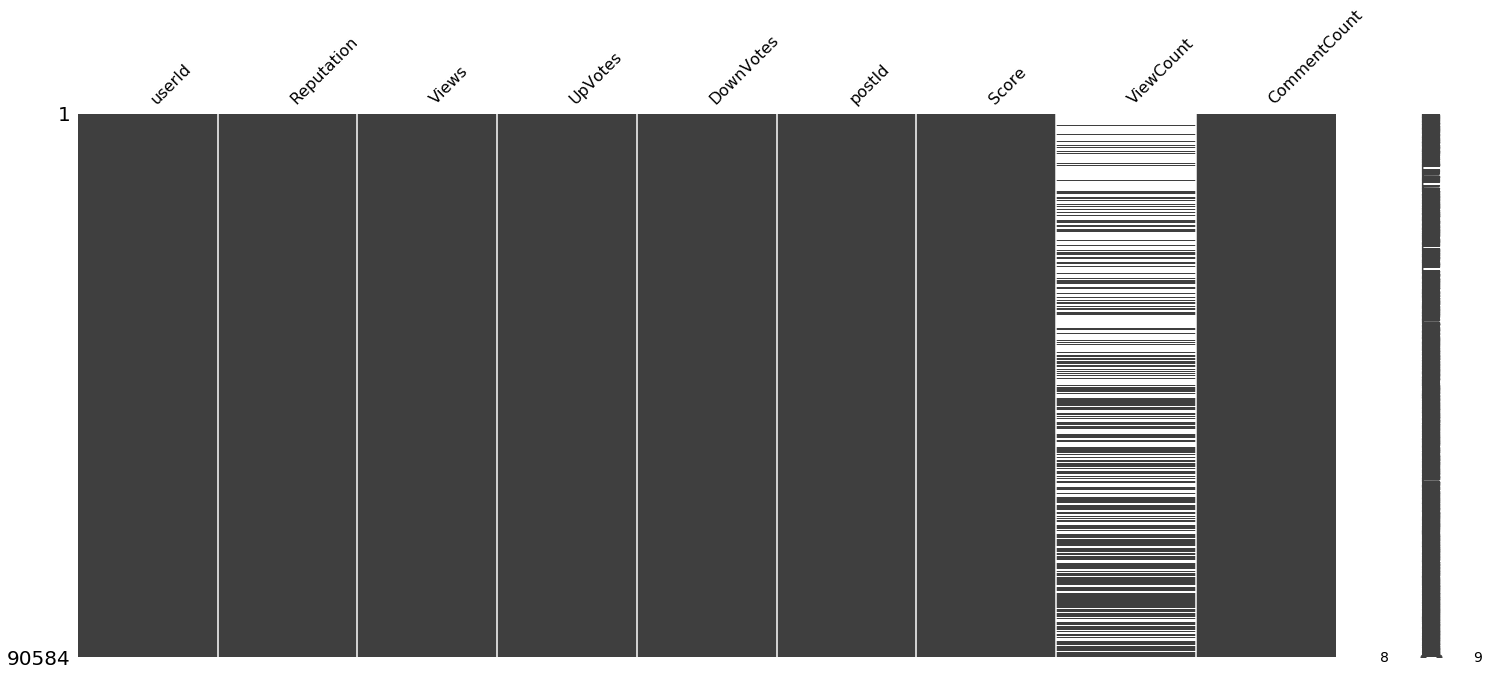

In [17]:
missingno.matrix(df3)

#### 11. You will need to make something with missing values.  Will you clean or filling them? Explain. 
**Remember** to check the results of your code before going to the next step.

In [11]:
null_values = df3['ViewCount'].isnull().sum()
total_values = len(df3['ViewCount'])
percentage = (null_values / total_values)*100

f'The percentage of null values in the ViewCount column is {percentage}'


'The percentage of null values in the ViewCount column is 53.42665371368012'

In [22]:
#Therefore since the ViewCount column has 53% of null values we will fill the values with 0

df3['ViewCount'].fillna(0,inplace=True)
df3

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
0,-1,1,0,5007,1920,2175,0,0.0,0
1,-1,1,0,5007,1920,8576,0,0.0,0
2,-1,1,0,5007,1920,8578,0,0.0,0
3,-1,1,0,5007,1920,8981,0,0.0,0
4,-1,1,0,5007,1920,8982,0,0.0,0
...,...,...,...,...,...,...,...,...,...
90579,55734,1,0,0,0,115352,0,16.0,0
90580,55738,11,0,0,0,115360,2,40.0,4
90581,55742,6,0,0,0,115366,1,17.0,0
90582,55744,6,1,0,0,115370,1,13.0,2


#### 12. Adjust the data types in order to avoid future issues. Which ones should be changed? 

In [23]:
df3.dtypes

userId            int64
Reputation        int64
Views             int64
UpVotes           int64
DownVotes         int64
postId            int64
Score             int64
ViewCount       float64
CommentCount      int64
dtype: object

In [28]:
df3['ViewCount'] = df3['ViewCount'].astype('int64')

In [31]:
df3.dtypes

userId          int64
Reputation      int64
Views           int64
UpVotes         int64
DownVotes       int64
postId          int64
Score           int64
ViewCount       int64
CommentCount    int64
dtype: object